In [1]:
#! pip install catboost
#! pip install lightgbm

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Дерево" data-toc-modified-id="Дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево</a></span></li><li><span><a href="#Лес" data-toc-modified-id="Лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#DummyRegressor" data-toc-modified-id="DummyRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>DummyRegressor</a></span></li></ul></li><li><span><a href="#Анализ-скорости-работы-и-качества-моделей" data-toc-modified-id="Анализ-скорости-работы-и-качества-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ скорости работы и качества моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

**Описание проекта**   
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.  
Заказчику важны:  
* качество предсказания;  
* скорость предсказания;  
* время обучения  

# Описание данных 

**Признаки**  
DateCrawled — дата скачивания анкеты из базы  
VehicleType — тип автомобильного кузова  
RegistrationYear — год регистрации автомобиля  
Gearbox — тип коробки передач  
Power — мощность (л. с.)  
Model — модель автомобиля  
Kilometer — пробег (км)  
RegistrationMonth — месяц регистрации автомобиля  
FuelType — тип топлива  
Brand — марка автомобиля  
NotRepaired — была машина в ремонте или нет  
DateCreated — дата создания анкеты  
NumberOfPictures — количество фотографий автомобиля  
PostalCode — почтовый индекс владельца анкеты (пользователя)  
LastSeen — дата последней активности пользователя  
**Целевой признак**  
Price — цена (евро)  

# **Инструкция по выполнению проекта**  

Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуйте более простые модели — иногда они работают лучше. Это редкие случаи, которые легко пропустить, если всегда применять только бустинг. Поэкспериментируйте и сравните характеристики моделей: скорость работы, точность результата.  
- Загрузите и подготовьте данные.    
- Обучите разные модели. Для каждой попробуйте различные гиперпараметры.  
- Проанализируйте скорость работы и качество моделей. 


**Примечания**  
Для оценки качества моделей применяйте метрику RMSE.  
Значение метрики RMSE должно быть меньше 2500.  
Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.  
Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.  
Поскольку модель градиентного бустинга может обучаться долго, измените у неё только два-три параметра.  
Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del:  

## Обзор данных

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor, Pool, cv
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    df = pd.read_csv('/datasets/autos.csv')
except: 
    df = pd.read_csv('autos.csv')

In [4]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Создадим функию для первичного обзора даннх

In [5]:
def review(df):
    print(f'инфо: {df.info()}')
    print('')
    print(f'Размер: {df.shape}')
    print('')
    print(f'Дубликаты: {df.duplicated().sum()}')
    print('')
    print(f'Пропуски:')
    df.isna().sum().plot(kind='bar', figsize=(20,10))
    plt.show()
    print('')
    display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

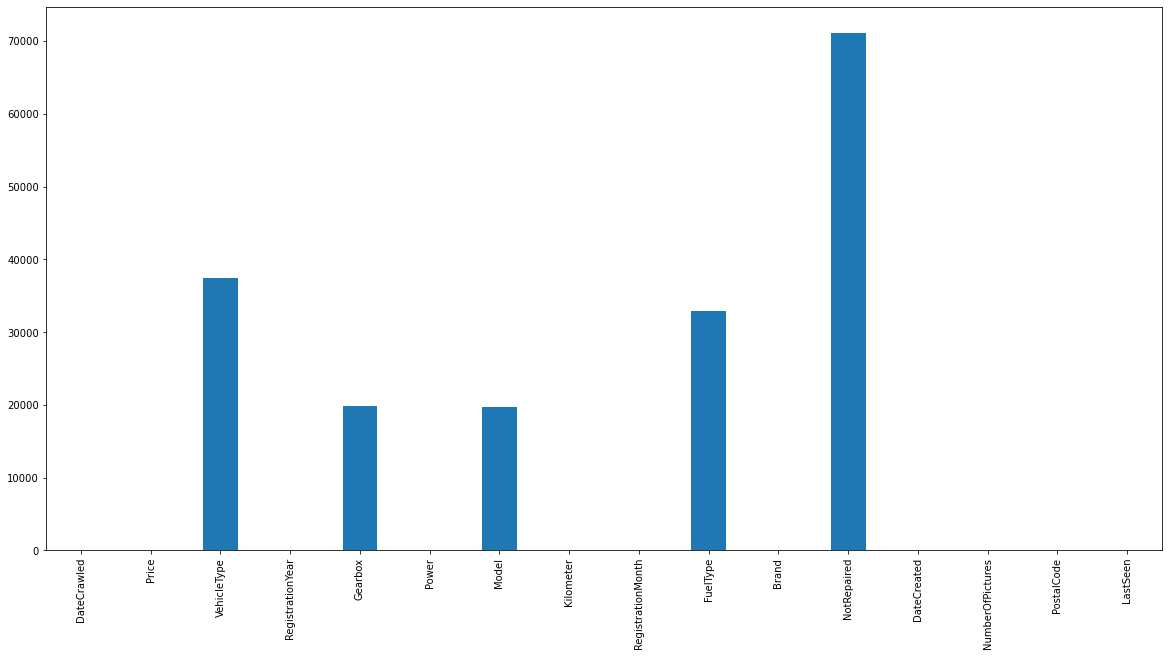

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
review(df)

### Вывод

* Дубликаты   
* Привести столбцы к змеинному регистру. 
* Пропуски: VehicleType, FuelType, NotRepaired, (Gearbox, Model).   
* NotRepaired - заменить цифрами.  
* Даты привести к нужному формату/соеденить год и месяц регистрации  
* Power - выбросы
* RegistrationYear - косяки
* RegistrationMonth - нулевой месяц
* Price - бесплатно/ м.б. больше косяков


## Предобработка

In [7]:
shape_origin = df.shape[0] # запомним начальный размер, чтобы после проверить процент оставшихся данных

In [8]:
df[df.duplicated()]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


Удалим дубликаты

In [9]:
df.drop_duplicates(inplace=True)

Приведем столбцы к змеиному регистру

In [10]:
for name in df.columns:
    rena = re.sub(r"(?=[A-Z])(?!^)", '_', name).lower()
    df = df.rename(columns={name:rena})

Заменим пропуски в 'not_repaired'. Скорее всего, если данные не указаны == ремонта не было

In [11]:
df['not_repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

In [12]:
df['not_repaired'] = df['not_repaired'].fillna('yes')

Приведем даты к нужному типу( пусть столбцы почувствуют себя важными перед смертью)

In [13]:
for date in ['date_created', 'date_crawled', 'last_seen']:
    df[date] = pd.to_datetime(df[date], format='%Y-%m-%d %H:%M:%S')

In [14]:
df = df.drop('registration_month', axis=1)

У нас есть однозначные аномалии в годе выпуска авто

(1900.0, 2022.0)

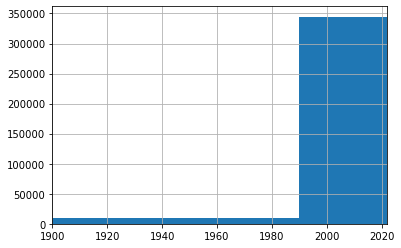

In [15]:
df['registration_year'].hist(bins=100)
plt.xlim(1900,2022)

In [16]:
df.query('registration_year < 1990 or registration_year >= 2016')['registration_year'].count()

33798

От общего объема это немного. Их проще удалить, чем разбираться в ошибке

In [17]:
df = df.query('registration_year > 1990 and registration_year <= 2016').copy()

In [18]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,yes,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,yes,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,yes,2016-03-14,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:26


С мощностями тоже не всё ладно

In [19]:
df['power'].unique()

array([    0,   190,   163,    75,    69,   102,   109,   125,   101,
         105,   140,   115,   131,    60,   136,   160,   231,    50,
         193,    99,   113,   218,   122,   129,   306,    95,    61,
         177,   170,    55,   143,   286,   232,   150,   156,    80,
          82,    90,   155,    54,   185,    87,    86,    84,   224,
         235,   200,   178,   265,    77,   110,   144,   120,   116,
         184,   126,   204,    88,   194,    64,   305,   197,   179,
         250,   313,    41,    45,   165,    98,   130,   114,   211,
          56,   118,   201,   213,    58,   107,    83,   174,   100,
         220,    73,   192,    68,    66,   299,    74,    52,   147,
         310,    71,    97,    65,   239,   203,     5,   300,   103,
          85,   258,   320,    63,    81,   148,    70,   145,   180,
         230,   280,   260,   104,   188,   333,   186,   117,   141,
         234,   158,    39,    92,    51,   135,    59,    53,   209,
          43,   146,

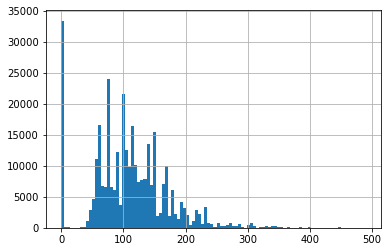

In [20]:
df.query('power < 500')['power'].hist(bins=100);

Попробуем, для начала, заменить кол-во лс медианой по таким же авто

In [21]:
def power_to_nan(row):
    power = row['power']
    if power < 50:
        return np.nan
    if power >= 50:
        return power

In [22]:
df['power'] = df.apply(power_to_nan, axis=1)
df['power'] = df['power'].fillna(df.groupby('model')['power'].transform('median'))
df.dropna(subset=['power'], inplace=True)

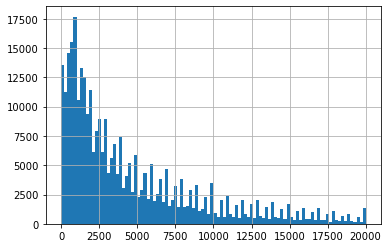

In [23]:
df['price'].hist(bins=100);

In [24]:
df['gearbox'].fillna('manual', inplace=True)

Тут у меня возникли сложности с границами цен, взял интуитивно

Заменим цены ниже 100 евро на К-близжайщих соседей. Но для начала подготовим датасет для дальнейшей работы

In [25]:
def price_to_nan(row):
    price = row['price']
    if price < 100:
        return np.nan
    if price >= 100:
        return price
df['price'] = df.apply(price_to_nan, axis=1)

In [26]:
df.isna().mean()

date_crawled          0.000000
price                 0.030740
vehicle_type          0.057486
registration_year     0.000000
gearbox               0.000000
power                 0.000000
model                 0.032633
kilometer             0.000000
fuel_type             0.069175
brand                 0.000000
not_repaired          0.000000
date_created          0.000000
number_of_pictures    0.000000
postal_code           0.000000
last_seen             0.000000
dtype: float64

Удалим лишние столбцы

In [27]:
df.drop(['date_crawled', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen'], axis=1, inplace=True)

In [28]:
df.pivot_table(index=['vehicle_type'], columns=['model'], values=['price'], aggfunc=['count'])

count                                                          \
              price                                                           
model           100   145    147    156    159 1_reihe     1er  200 2_reihe   
vehicle_type                                                                  
bus             NaN   NaN    NaN    NaN    NaN     4.0     NaN  NaN     3.0   
convertible     1.0   NaN    NaN    NaN    NaN     6.0   251.0  1.0  1494.0   
coupe           1.0   2.0   26.0    3.0    NaN     3.0   242.0  NaN    33.0   
other           NaN   1.0    6.0    1.0    NaN     1.0    20.0  NaN    10.0   
sedan         161.0  12.0  358.0  267.0   55.0    30.0  2642.0  NaN   186.0   
small           NaN  19.0   93.0    2.0    NaN  1051.0   138.0  NaN  2456.0   
suv             NaN   NaN    0.0    NaN    NaN     NaN     NaN  NaN     4.0   
wagon          69.0   NaN    2.0  281.0  143.0    53.0    20.0  NaN   270.0   

                    ...                                                  \
                    ...                                                   
model         300c  ... wrangler x_reihe x_trail x_type xc_reihe  yaris   
vehicle_type        ...                                                   
bus            NaN  ...      NaN     3.0     1.0    NaN      NaN   42.0   
convertible    NaN  ...      NaN     NaN     NaN    NaN      NaN    NaN   
coupe          NaN  ...      NaN     NaN     NaN    NaN      NaN    NaN   
other          NaN  ...      1.0     1.0     1.0    NaN      NaN    3.0   
sedan         59.0  ...      NaN   725.0     NaN  115.0      3.0   27.0   
small          NaN  ...      NaN     NaN     NaN    NaN      NaN  879.0   
suv            NaN  ...     80.0   771.0   196.0    NaN    216.0    NaN   
wagon         69.0  ...      NaN     8.0     NaN   30.0     41.0    7.0   

                                             
                                             
model          yeti ypsilon z_reihe  zafira  
vehicle_type                                 
bus             NaN     NaN     NaN  2364.0  
convertible     NaN     1.0   645.0     1.0  
coupe           NaN     NaN    50.0     1.0  
other           2.0     NaN     NaN    22.0  
sedan           NaN     NaN     1.0    22.0  
small           NaN   175.0     NaN    11.0  
suv           168.0     NaN     NaN     7.0  
wagon           1.0     NaN     NaN   223.0  

[8 rows x 246 columns]

vehicle_type и fuel_type бывает разным у одной модели.  
Поэтому заменим пропуски на заглушку и посмотрим как будет дальше

In [29]:
df_cat = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
df_col = ['registration_year', 'power', 'kilometer']

In [30]:
df[df_cat+df_col] = df[df_cat+df_col].fillna('unknown')

Применим порядковое кодирование

In [31]:
encoder = OrdinalEncoder()

df[df_cat] = pd.DataFrame(encoder.fit_transform(df[df_cat]),
                                columns=df[df_cat].columns, 
                                index=df[df_cat].index)

И заменим, наконец-то, аномальные цены на K-близжайщих соседей

In [32]:
#imputer = KNNImputer()
#imputer.fit(df)

In [33]:
df['price'] = df['price'].fillna(df.groupby(['model', 'registration_year'])['price'].transform('median'))

In [34]:
df.dropna(subset=['price'], inplace=True)

In [35]:
df['price'].isna().sum()

0

<div class="alert alert-info"> 
    Убрал KNN, заменил медианой по модели и году выпуска

In [36]:
#%%time
#df = pd.DataFrame(imputer.transform(df), columns = df.columns)

In [37]:
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480.0,7.0,1993,1.0,101.0,115.0,150000,6.0,38.0,1.0
1,18300.0,2.0,2011,1.0,190.0,224.0,125000,2.0,1.0,1.0
2,9800.0,6.0,2004,0.0,163.0,116.0,125000,2.0,14.0,1.0
3,1500.0,5.0,2001,1.0,75.0,115.0,150000,6.0,38.0,0.0
4,3600.0,5.0,2008,1.0,69.0,100.0,90000,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...
354363,1150.0,0.0,2000,1.0,125.0,246.0,150000,6.0,24.0,0.0
354364,2500.0,7.0,2005,1.0,82.0,77.0,150000,6.0,22.0,1.0
354366,1199.0,1.0,2000,0.0,101.0,105.0,125000,6.0,32.0,0.0
354367,9200.0,0.0,1996,1.0,102.0,220.0,150000,2.0,38.0,0.0


In [38]:
df.shape[0] / shape_origin

0.909323332458539

Удалили всего 6% данных.

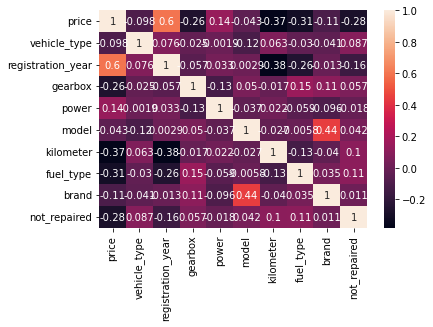

In [39]:
sns.heatmap(df.corr(), annot=True);

Особой зависимости между столбцами нет, мультиколлинеарности быть не болжно 

## Обучение модели

In [40]:
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480.0,7.0,1993,1.0,101.0,115.0,150000,6.0,38.0,1.0
1,18300.0,2.0,2011,1.0,190.0,224.0,125000,2.0,1.0,1.0
2,9800.0,6.0,2004,0.0,163.0,116.0,125000,2.0,14.0,1.0
3,1500.0,5.0,2001,1.0,75.0,115.0,150000,6.0,38.0,0.0
4,3600.0,5.0,2008,1.0,69.0,100.0,90000,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...
354363,1150.0,0.0,2000,1.0,125.0,246.0,150000,6.0,24.0,0.0
354364,2500.0,7.0,2005,1.0,82.0,77.0,150000,6.0,22.0,1.0
354366,1199.0,1.0,2000,0.0,101.0,105.0,125000,6.0,32.0,0.0
354367,9200.0,0.0,1996,1.0,102.0,220.0,150000,2.0,38.0,0.0


In [41]:
X = df.drop(['price'], axis=1)
y = df['price']
print(X.shape)
y.shape

(322236, 9)


(322236,)

In [42]:
X = X.astype('int')

In [43]:
y = y.astype('int')

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322236 entries, 0 to 354368
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   vehicle_type       322236 non-null  int32
 1   registration_year  322236 non-null  int32
 2   gearbox            322236 non-null  int32
 3   power              322236 non-null  int32
 4   model              322236 non-null  int32
 5   kilometer          322236 non-null  int32
 6   fuel_type          322236 non-null  int32
 7   brand              322236 non-null  int32
 8   not_repaired       322236 non-null  int32
dtypes: int32(9)
memory usage: 13.5 MB


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=42)
print(X_train.shape)
X_test.shape

(241677, 9)


(80559, 9)

Проскаллируем данные

In [46]:
scaler = StandardScaler()
scaler.fit(X_train[df_col])
X_train[df_col] = scaler.transform(X_train[df_col])
X_test[df_col] = scaler.transform(X_test[df_col])

In [47]:
X_train

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
104383,7,0.311554,1,-0.123602,41,-3.375451,6,24,1
134494,5,1.579887,1,-0.139886,150,-1.605574,6,23,0
106518,0,-1.137969,1,-0.042182,35,0.572737,6,30,0
17883,6,1.398697,0,0.397489,205,0.572737,2,15,0
164149,6,0.311554,1,0.142371,238,0.572737,2,2,1
...,...,...,...,...,...,...,...,...,...
131683,6,0.311554,1,0.050095,165,0.572737,2,23,0
284949,2,-0.956779,1,0.066379,231,0.572737,6,24,1
144977,4,-0.413207,1,-0.074750,36,0.572737,2,23,0
161437,4,0.492745,1,0.088091,169,0.572737,2,38,1


### Дерево

In [32]:
#params = {'max_depth': range(2,20)}

In [33]:
#dtc = DecisionTreeRegressor(random_state=42)
#dtc_cv = RandomizedSearchCV(dtc, params, scoring='neg_root_mean_squared_error', random_state=42)
#dtc_cv.fit(X_train, y_train)
#print(dtc_cv.best_params_)


{'max_depth': 10}


In [34]:
dtc = DecisionTreeRegressor(max_depth=10, random_state=42)

In [35]:
%%time
dtc.fit(X_train, y_train)

CPU times: user 211 ms, sys: 912 µs, total: 212 ms
Wall time: 219 ms


DecisionTreeRegressor(max_depth=10, random_state=42)

In [36]:
%%time
y_pred = dtc.predict(X_test)

CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 17.4 ms


In [37]:
mean_squared_error(y_test, y_pred,  squared= False)

1937.8125696246873

### Лес

In [38]:
#params = {"bootstrap": (True, False), 
       # "max_depth": range(2, 20), 
        #"n_estimators": range(100, 1000) }

In [ ]:
#rfc = RandomForestRegressor(random_state=42)
#bayes = RandomizedSearchCV(rfc, params, n_iter = 30, random_state=42)
#bayes.fit(X_train, y_train)
#bayes.best_params_

'%%time\n\nrfc = RandomForestRegressor(random_state=42)\n\nbayes = BayesSearchCV(rfc, search_space, n_iter = 30, random_state=42)\nbayes.fit(X_train, y_train)\nbayes.best_params_'

In [40]:
rfc = RandomForestRegressor(bootstrap=True, max_depth=9, n_estimators=500, random_state=42)

In [41]:
%%time
rfc.fit(X_train, y_train)

CPU times: user 53.7 s, sys: 112 ms, total: 53.8 s
Wall time: 58.3 s


RandomForestRegressor(max_depth=9, n_estimators=500, random_state=42)

In [42]:
%%time 
y_pred = rfc.predict(X_test)

CPU times: user 1.55 s, sys: 6.91 ms, total: 1.56 s
Wall time: 1.65 s


In [43]:
mean_squared_error(y_test, y_pred,  squared= False)

1840.6054824282967

Не получилось у меня запустить лес, ядро помирает

### CatBoost

In [44]:
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=df_cat
                 )

test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=df_cat
                 )

In [45]:
params = {'cat_features': df_cat,
          'loss_function': 'RMSE',
              'random_seed': 42,
              'verbose':100}

In [ ]:
'''%%time
cv_data = cv(
    params = params,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    verbose=False,
    plot="True"
)'''
''

''

In [46]:
model = CatBoostRegressor(**params)

In [47]:
%%time
model.fit(train_data)

Learning rate set to 0.078762
0:	learn: 4289.4352389	total: 113ms	remaining: 1m 52s
100:	learn: 1710.3979536	total: 5.28s	remaining: 47s
200:	learn: 1626.2787118	total: 10.2s	remaining: 40.7s
300:	learn: 1578.0802624	total: 15.1s	remaining: 35s
400:	learn: 1548.2872042	total: 20s	remaining: 29.8s
500:	learn: 1522.8748594	total: 25.6s	remaining: 25.5s
600:	learn: 1503.3478181	total: 30.4s	remaining: 20.2s
700:	learn: 1487.4394078	total: 35.2s	remaining: 15s
800:	learn: 1472.0032668	total: 40s	remaining: 9.95s
900:	learn: 1458.3132481	total: 44.9s	remaining: 4.93s
999:	learn: 1446.9897364	total: 49.8s	remaining: 0us
CPU times: user 1min 33s, sys: 1.84 s, total: 1min 35s
Wall time: 50.3 s


In [48]:
%%time
y_pred = model.predict(test_data)

CPU times: user 232 ms, sys: 38 ms, total: 270 ms
Wall time: 166 ms


In [50]:
rmse_cat = mean_squared_error(y_test, y_pred,  squared= False)
rmse_cat

1565.9325286541277

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,registration_year,34.902441
1,power,24.558128
2,vehicle_type,12.360127
3,kilometer,10.929392
4,brand,8.151038
5,model,4.776686
6,not_repaired,1.952480
7,fuel_type,1.914391
8,gearbox,0.455316


Самым важным признаком для цены стал год выпуска авто

### Линейная регрессия

In [66]:
lr = LinearRegression()
cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean() * -1

3134.3860385151356

In [62]:
%%time
lr.fit(X_train, y_train)

Wall time: 102 ms


LinearRegression()

In [63]:
%%time
pred_reg = lr.predict(X_test)

Wall time: 5.99 ms


In [64]:
rmse_lr = mean_squared_error(y_test, pred_reg,  squared= False)
rmse_lr

3124.3043387405237

###  LightGBM

In [ ]:
'''%%time

regressor = LGBMRegressor() 
search_space = {'num_leaves':[31, 100, 200], 
                'learning_rate':[0.1, 0.3, 0.5]}

bayes = RandomizedSearchCV(regressor, search_space, n_iter = 30, random_state=42)
bayes.fit(X_train, y_train)
bayes.best_params_'''

In [56]:
model = LGBMRegressor(learning_rate = 0.3, num_leaves = 200, random_state=42)

In [57]:
%%time
model.fit(X_train, y_train)

CPU times: user 1.92 s, sys: 91 ms, total: 2.01 s
Wall time: 1.07 s


LGBMRegressor(learning_rate=0.3, num_leaves=200, random_state=42)

In [58]:
%%time
LGBM_pred = model.predict(X_test)

CPU times: user 245 ms, sys: 963 µs, total: 246 ms
Wall time: 138 ms


In [59]:
rmse_LGBM = (mean_squared_error(y_test, LGBM_pred))**0.5
rmse_LGBM

1585.0365820165584

### DummyRegressor

In [60]:
dummy =  DummyRegressor()

In [61]:
%%time
dummy.fit(X_train, y_train)

CPU times: user 553 µs, sys: 11 µs, total: 564 µs
Wall time: 574 µs


DummyRegressor()

In [62]:
%%time
pred_dummy = dummy.predict(X_test)

CPU times: user 305 µs, sys: 6 µs, total: 311 µs
Wall time: 308 µs


In [63]:
rmse_dummy = (mean_squared_error(y_test, pred_dummy))**0.5
rmse_dummy

4531.24354887397

## Анализ скорости работы и качества моделей

In [64]:
data = {'Время обучения(сек)':[50.3, 0.047, 1.07, 0.0005, 0.219, 58.3], 'Время предсказания(сек)':[0.166, 0.009, 0.138, 0.0003, 0.017, 1.65], 'RMSE':[1565.93, 3106.33, 1585.03, 4531.24, 1937.81, 1840.60]}
index=['CatBoost', 'LinearRegression', 'LightGBM', 'DummyRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor' ]

In [65]:
final = pd.DataFrame(data=data, index=index)
final

,Время обучения(сек),Время предсказания(сек),RMSE
CatBoost,50.3000,0.1660,1565.93
LinearRegression,0.0470,0.0090,3106.33
LightGBM,1.0700,0.1380,1585.03
DummyRegressor,0.0005,0.0003,4531.24
DecisionTreeRegressor,0.2190,0.0170,1937.81
RandomForestRegressor,58.3000,1.6500,1840.60


## Выводы

Мы загрузили и изучили данные, провели их предобработку, заменив пропуски и аномальные значения и обучили несколько моделей на данных, проанализировав их качество и скорость.  
Таким образом:
- самым быстрым по времени обучения стал DecisionTreeRegressor (0.21 секунд)
- самым быстрым по предсказанию оказался DecisionTreeRegressor (0.0170 секунд)
- лучший RMSE у CatBoost (1565.93)